# Uppgift 1

#### Import the data and do a quick check

In [1]:
import pandas as pd

In [2]:
veckodata = pd.read_excel("../Lab1-Covid/Folkhalsomyndigheten_Covid19.xlsx", sheet_name="Veckodata Riket")
veckodata.head()

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020,6,1,0,0,1,0,0,0,0,0.0,0,0.0
1,2020,7,0,0,0,1,0,0,0,0,0.0,0,0.0
2,2020,8,0,0,0,1,0,0,0,0,0.0,0,0.0
3,2020,9,13,0,0,14,0,0,0,0,0.0,0,0.0
4,2020,10,211,2,2,225,2,3,3,0,0.0,0,0.0


In [3]:
veckodata.info(), veckodata.describe(), veckodata.value_counts(), veckodata.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   år                              142 non-null    int64  
 1   veckonummer                     142 non-null    int64  
 2   Antal_fall_vecka                142 non-null    int64  
 3   Antal_fall_100000inv_vecka      142 non-null    int64  
 4   Antal_fall_100000inv_14dagar    142 non-null    int64  
 5   Kum_antal_fall                  142 non-null    int64  
 6   Kum_fall_100000inv              142 non-null    int64  
 7   Antal_nyaintensivvårdade_vecka  142 non-null    int64  
 8   Kum_antal_intensivvårdade       142 non-null    int64  
 9   Antal_avlidna_vecka             142 non-null    int64  
 10  Antal_avlidna_milj_inv_vecka    142 non-null    float64
 11  Kum_antal_avlidna               142 non-null    int64  
 12  Kum_antal_avlidna_milj_inv      142 

(None,
                 år  veckonummer  Antal_fall_vecka  Antal_fall_100000inv_vecka  \
 count   142.000000   142.000000        142.000000                  142.000000   
 mean   2020.957746    26.035211      18378.345070                  177.197183   
 std       0.797809    14.228835      38569.455753                  371.689114   
 min    2020.000000     1.000000          0.000000                    0.000000   
 25%    2020.000000    14.000000       3075.000000                   30.000000   
 50%    2021.000000    26.000000       5531.000000                   53.000000   
 75%    2022.000000    37.750000      21125.000000                  203.500000   
 max    2022.000000    53.000000     265043.000000                 2554.000000   
 
        Antal_fall_100000inv_14dagar  Kum_antal_fall  Kum_fall_100000inv  \
 count                    142.000000    1.420000e+02          142.000000   
 mean                     354.169014    1.125288e+06        10843.281690   
 std                     

We have no 0 values in this data. Dataset seems to be complete.

------------------------------------

#### B) 
Add columns "år" och "veckonummer" to a new column with the name "Vecka".
In the format: 2020v6 etc.


In [4]:
veckodata["Vecka"] = veckodata["år"].astype("str") + "v" + veckodata["veckonummer"].astype("str")
veckodata.head()

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv,Vecka
0,2020,6,1,0,0,1,0,0,0,0,0.0,0,0.0,2020v6
1,2020,7,0,0,0,1,0,0,0,0,0.0,0,0.0,2020v7
2,2020,8,0,0,0,1,0,0,0,0,0.0,0,0.0,2020v8
3,2020,9,13,0,0,14,0,0,0,0,0.0,0,0.0,2020v9
4,2020,10,211,2,2,225,2,3,3,0,0.0,0,0.0,2020v10


------------------------------
#### C - F
 - c) Draw Line Chart with deceased per week from 2020v6, with Seaborn and Plotly express
 - d) Draw a Line Chart with new cases  2020v6. 
 - e) Draw a Line Chart with new cases per week and deceased per week 2020v6.
 - f) Draw a chart for cumulative cases from 2020v6.


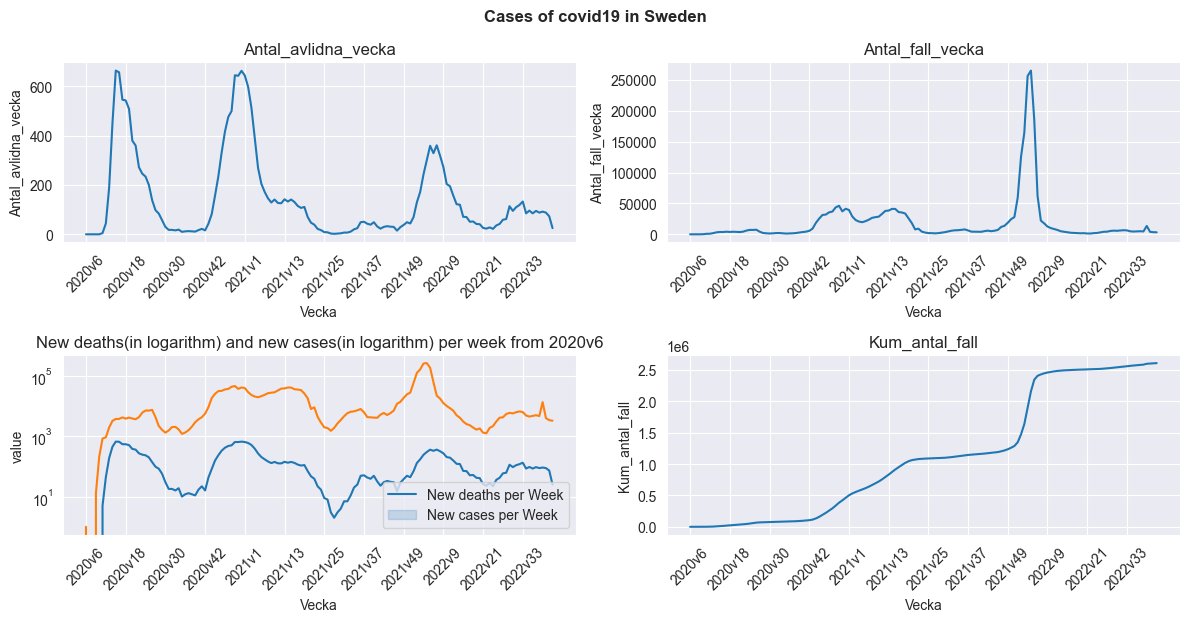

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,2, dpi=100, figsize=(12,6))

y_variables = ["Antal_avlidna_vecka","Antal_fall_vecka", "Antal_avlidna_vecka", "Kum_antal_fall"]

for ax, y_variable in zip(axes.flatten(), y_variables):
    sns.lineplot(data=veckodata, x="Vecka", y=y_variable, ax=ax)
    ax.set(title=f"{y_variable}", ylabel=f"{y_variable}", xticks=veckodata["Vecka"][::12])
    ax.tick_params(axis = "x", rotation = 45)
    plt.grid()

sns.lineplot(data=veckodata, x="Vecka", y=y_variables[1], ax=axes[1,0])  
axes[1,0].set(title="New deaths(in logarithm) and new cases(in logarithm) per week from 2020v6", ylabel="value", xticks=veckodata["Vecka"][::12])
axes[1,0].set_yscale("log") 
axes[1,0].legend(labels=["New deaths per Week", "New cases per Week"])
        
fig.tight_layout()
fig.suptitle("Cases of covid19 in Sweden", y=1.03, fontweight="bold")
plt.savefig("Output/covid19_sweden.png", facecolor="white")

### Same task but with Plotly

In [16]:
import plotly_express as px


def px_line(dataframe=veckodata, x="Vecka", log_y=False, y=None, title=None):
    
    fig = px.line(dataframe, x=x, y=y, markers=True, log_y=log_y,
        title=title,
        labels=dict(Vecka="week"),
        )

    fig.update_layout(hovermode="x")
    fig.update_xaxes(showspikes=True,
                 spikedash="solid",
                 spikemode="across",
                 spikecolor="green",
                 spikesnap="cursor"
                 )
    fig.show()
    fig.write_html(f"Output/Q2.{title}.html", auto_open=False)

In [17]:
y_variables = {"Antal_avlidna_vecka": "New deaths per week","Antal_fall_vecka" : "New cases per week", "Antal_avlidna_vecka": "New deaths and new cases per week", "Kum_antal_fall": "Cumulative cases per week"}

for y_variable in y_variables:
    px_line(y=y_variable, title=y_variables[y_variable])

px_line(y=["Antal_avlidna_vecka", "Antal_fall_vecka"], log_y=True, title="New deaths(in logarithm) and new cases(in logarithm) per week from 2020v6")


---------------------
# Vaccin Data

In [18]:
import pandas as pd

In [19]:
vaccindata = pd.read_excel("../Lab1-Covid/Folkhalsomyndigheten_Covid19_Vaccine.xlsx", sheet_name="Vaccinerade kommun och ålder")
vaccindata.head()

,Län,Län_namn,Kommun,Kommun_namn,Ålder,Befolkning,Antal minst 1 dos,Antal minst 2 doser,Antal 3 doser,Antal 4 doser,Andel minst 1 dos,Andel minst 2 doser,Andel 3 doser,Andel 4 doser
0,1,Stockholms län,114,Upplands Väsby,12-15,2422,1206,1046,NaN,NaN,0.497936,0.431874,NaN,NaN
1,1,Stockholms län,114,Upplands Väsby,16-17,1203,836,753,NaN,NaN,0.694929,0.625935,NaN,NaN
2,1,Stockholms län,114,Upplands Väsby,18-29,6692,4883,4464,1957.0,NaN,0.729677,0.667065,0.292439,NaN
3,1,Stockholms län,114,Upplands Väsby,30-39,7332,5550,5249,2881.0,NaN,0.756956,0.715903,0.392935,NaN
4,1,Stockholms län,114,Upplands Väsby,40-49,6946,5587,5425,3720.0,NaN,0.804348,0.781025,0.535560,NaN


In [27]:
# a) Hur många län finns representerade?

antal_län = vaccindata["Län_namn"].unique()
print(f"Det finns {len(antal_län)} representerade i datan.")

Det finns 21 representerade i datasettet.


In [29]:
# b) Hur många kommuner finns representerade i datasetet?

antal_kommuner = vaccindata["Kommun_namn"].unique()
print(f"Det finns {len(antal_kommuner)} representerade i datan.")


Det finns 290 representerade i datan.


In [33]:
# c) Hur stor är befolkningen som är representerad i datasetet?

total_befolkning = vaccindata["Befolkning"].sum()
print(f"Totala befolkning är {total_befolkning} som är representerad i datan.")

Totala befolkning är 9092790 som är representerad i datan.


In [76]:
# d)  Beräkna hur många barn under 18 år det finns i Sverige baserat på det här datasetet. Du får leta upp
#     statistik på hur stor totala befolkningen är i Sverige.

befolkning_sverige = pd.read_excel("../Lab1-Covid/tabkv12022.xlsx", sheet_name="Totalt")
folkmängd = befolkning_sverige.iloc[7]["Unnamed: 2"]
print(f"Total folkmängd: {folkmängd} vid Jan-2022.")

# folkmängd över > 18.
above_18 = vaccindata.loc[(vaccindata['Ålder'] != '12-15') & (vaccindata['Ålder'] != '16-17')]
print(f"Total folkmängd över 18: {above_18['Befolkning'].sum()}")

# Folkmängd under 18.
under_18 = folkmängd - above_18["Befolkning"].sum()
print(f"Total folkmängd under 18: {under_18}")





Total folkmängd: 10468482 vid Jan-2022.
Total folkmängd över 18: 8347420
Total folkmängd under 18: 2121062


8347420